In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/FYP

/content/drive/MyDrive/FYP


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Demographics data

In [132]:
demo_df = pd.read_csv('2024-Q3/DEMO24Q3.txt', sep='$')
demo_df

<ipython-input-132-ed8bd779cf36>:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  demo_df = pd.read_csv('2024-Q3/DEMO24Q3.txt', sep='$')


,primaryid,caseid,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,age_grp,sex,e_sub,wt,wt_cod,rept_dt,to_mfr,occp_cod,reporter_country,occr_country
0,100138392,10013839,2,F,NaN,20240716,20140316,20240726,EXP,NaN,...,NaN,M,Y,NaN,NaN,20240726,NaN,HP,FI,FI
1,1002310548,10023105,48,F,20140101.0,20240626,20140320,20240715,EXP,NaN,...,E,F,Y,NaN,NaN,20240715,NaN,MD,CA,CA
2,100313066,10031306,6,F,20130101.0,20240726,20140324,20240802,EXP,NaN,...,NaN,F,Y,53.0,KG,20240802,NaN,MD,JP,JP
3,100445154,10044515,4,F,NaN,20240429,20140328,20240922,EXP,NaN,...,NaN,F,Y,110.0,KG,20240922,NaN,HP,IT,IT
4,100635983,10063598,3,F,20140319.0,20240715,20140407,20240725,EXP,NaN,...,NaN,M,Y,89.0,KG,20240725,NaN,MD,GB,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405508,989327138,9893271,38,F,20130603.0,20240307,20140213,20240730,EXP,NaN,...,A,F,Y,74.0,KG,20240730,NaN,MD,CA,CA
405509,98974507,9897450,7,F,20120123.0,20231018,20140214,20240919,EXP,NaN,...,A,M,Y,72.0,KG,20240919,NaN,MD,ES,ES
405510,98994952,9899495,2,F,NaN,20240927,20140214,20240927,EXP,NaN,...,NaN,M,Y,NaN,NaN,20240927,NaN,HP,IT,IT
405511,99199918,9919991,8,F,20131203.0,20240822,20140224,20240903,EXP,NaN,...,A,F,Y,55.4,KG,20240903,NaN,CN,GB,GB


In [133]:
#Step 01: Selecting only the necessary columns
demo_df_2 = demo_df[['primaryid', 'caseid', 'i_f_code', 'age', 'age_cod', 'age_grp', 'sex', 'wt', 'wt_cod', 'init_fda_dt', 'fda_dt', 'reporter_country', 'occr_country']]
demo_df_2

,primaryid,caseid,i_f_code,age,age_cod,age_grp,sex,wt,wt_cod,init_fda_dt,fda_dt,reporter_country,occr_country
0,100138392,10013839,F,37.0,YR,NaN,M,NaN,NaN,20140316,20240726,FI,FI
1,1002310548,10023105,F,66.0,YR,E,F,NaN,NaN,20140320,20240715,CA,CA
2,100313066,10031306,F,58.0,YR,NaN,F,53.0,KG,20140324,20240802,JP,JP
3,100445154,10044515,F,55.0,YR,NaN,F,110.0,KG,20140328,20240922,IT,IT
4,100635983,10063598,F,64.0,YR,NaN,M,89.0,KG,20140407,20240725,GB,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405508,989327138,9893271,F,35.0,YR,A,F,74.0,KG,20140213,20240730,CA,CA
405509,98974507,9897450,F,64.0,YR,A,M,72.0,KG,20140214,20240919,ES,ES
405510,98994952,9899495,F,72.0,YR,NaN,M,NaN,NaN,20140214,20240927,IT,IT
405511,99199918,9919991,F,60.0,YR,A,F,55.4,KG,20140224,20240903,GB,GB


In [134]:
#Step 02: Selecting only the pediatric population
age_grps = ['N', 'I', 'C', 'T']

demo_pedi_raw = demo_df_2[(demo_df_2['age_grp'].isin(age_grps)) | ((demo_df_2['age_grp'].isna()) & (demo_df_2['age']<19))]
demo_pedi_raw.head()

,primaryid,caseid,i_f_code,age,age_cod,age_grp,sex,wt,wt_cod,init_fda_dt,fda_dt,reporter_country,occr_country
27,102763263,10276326,F,10.0,YR,C,M,NaN,NaN,20140703,20240825,US,US
30,102857464,10285746,F,4.0,YR,C,M,67.200,KG,20140709,20240916,US,US
38,104473652,10447365,F,17.0,YR,T,M,58.968,KG,20140911,20240814,US,US
39,104475582,10447558,F,3.0,MON,I,F,NaN,NaN,20140911,20240814,US,US
43,104802623,10480262,F,10.0,YR,NaN,F,NaN,NaN,20140929,20240903,US,US


In [135]:
len(demo_pedi_raw)

24676

In [136]:
#Missing value counts and propotions
demo_pedi_raw.isna().sum()

,0
primaryid,0
caseid,0
i_f_code,0
age,2989
age_cod,2989
age_grp,13747
sex,1856
wt,18733
wt_cod,18733
init_fda_dt,0


In [137]:
#Step 03: Checking if there are age values without age_code values from the age_grp selection
#If yes, remove them (Filter them out using ~ or !=)
demo_pedi_raw[(demo_pedi_raw['age'].isna() == False) & (demo_pedi_raw['age_cod'].isna() == True) & (demo_pedi_raw['age_grp'].isna() == True)]
#There are no any age values that misses age code that were selected from the age (ones without age grp)

,primaryid,caseid,i_f_code,age,age_cod,age_grp,sex,wt,wt_cod,init_fda_dt,fda_dt,reporter_country,occr_country


In [138]:
#Step 04: Check if there are age values that misses the age_cod that are from filtered < 19 data without a age_grp value
#If yes, remove them as well (Filter out)
demo_pedi_raw[(demo_pedi_raw['age'].isna() == False) & (demo_pedi_raw['age_cod'].isna() == True) & (demo_pedi_raw['age_grp'].isna() == False)]
#There are no any age values without age codes from the ones that were selected from the age groups

,primaryid,caseid,i_f_code,age,age_cod,age_grp,sex,wt,wt_cod,init_fda_dt,fda_dt,reporter_country,occr_country


In [139]:
#Step 05: It's important to disregard age values (which are in years) that are higher than 18
demo_pedi_raw[(demo_pedi_raw['age'] > 18) & (demo_pedi_raw['age_cod'] == 'YR')]
#demo_pedi_raw[((demo_pedi_raw['age'] > 18) & (demo_pedi_raw['age_cod'].isna()==True)) | ((demo_pedi_raw['age']>18) & (demo_pedi_raw['age_grp']=='YR'))]

,primaryid,caseid,i_f_code,age,age_cod,age_grp,sex,wt,wt_cod,init_fda_dt,fda_dt,reporter_country,occr_country
98929,240467991,24046799,I,20.0,YR,C,F,NaN,NaN,20240703,20240703,US,US
184052,241374921,24137492,I,21.0,YR,T,F,NaN,NaN,20240725,20240725,US,US
210895,241661291,24166129,I,24.0,YR,T,M,NaN,NaN,20240802,20240802,US,US


In [140]:
len(demo_pedi_raw)

24676

In [141]:
#Step 05: Filter out age values that are higher than 18 in years
demo_pedi_raw = demo_pedi_raw[~((demo_pedi_raw['age'] > 18) & (demo_pedi_raw['age_cod'] == 'YR'))]
len(demo_pedi_raw)

24673

In [142]:
#Step 06: Remove age_cod as DEC
demo_pedi_raw = demo_pedi_raw[demo_pedi_raw['age_cod'] != 'DEC']
len(demo_pedi_raw)
demo_pedi_raw['age_cod'].value_counts()

,count
age_cod,
YR,18238
MON,999
DY,335
WK,136
HR,11


Keep all the values. But convert them to years and use min-max scaling so that the small values won't be ignored when model is trained (regression model)

Also, add a custom age group category for binning for rule mining

Also, apply min-max scaler on the ages because the model predictions are happened from that

In [143]:
#A function to convert months into years
def convertMt_Yr(df):
  if df['age_cod'] == 'MON':
    conv= round(df['age'] / 12,2)
    return conv
  elif df['age_cod'] == 'WK':
    conv = round(df['age'] / 52.1429, 2)
    return conv
  elif df['age_cod'] == 'DY':
    conv = round(df['age']/ 365, 2)
    return conv
  elif df['age_cod'] == 'HR':
    conv = round(df['age']/8760, 2)
    return conv
  elif df['age_cod'] == 'YR':
    return df['age']

In [144]:
#Step 07: Applying the function
demo_pedi_raw['age_yrs'] = demo_pedi_raw.apply(convertMt_Yr, axis=1)
demo_pedi_raw

,primaryid,caseid,i_f_code,age,age_cod,age_grp,sex,wt,wt_cod,init_fda_dt,fda_dt,reporter_country,occr_country,age_yrs
27,102763263,10276326,F,10.0,YR,C,M,NaN,NaN,20140703,20240825,US,US,10.00
30,102857464,10285746,F,4.0,YR,C,M,67.200,KG,20140709,20240916,US,US,4.00
38,104473652,10447365,F,17.0,YR,T,M,58.968,KG,20140911,20240814,US,US,17.00
39,104475582,10447558,F,3.0,MON,I,F,NaN,NaN,20140911,20240814,US,US,0.25
43,104802623,10480262,F,10.0,YR,NaN,F,NaN,NaN,20140929,20240903,US,US,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405443,82673573,8267357,F,1.0,YR,I,F,NaN,NaN,20111121,20240924,PL,PL,1.00
405444,828579140,8285791,F,12.0,YR,NaN,M,NaN,NaN,20111213,20240905,CA,CA,12.00
405459,879556810,8795568,F,14.0,YR,T,M,78.000,KG,20120917,20240730,CA,CA,14.00
405468,89578312,8957831,F,6.0,YR,NaN,M,NaN,NaN,20121210,20240710,US,US,6.00


In [145]:
#A function for binning ages
def age_Bins(df):
  if df['age_yrs'] < 0.08:
    return "Neonate"
  elif df['age_yrs'] >= 0.08 and df['age_yrs'] < 1:
    return "Infant"
  elif df['age_yrs'] >= 1 and df['age_yrs'] < 4:
    return "Toddler"
  elif df['age_yrs'] >= 4 and df['age_yrs'] < 7:
    return "Preschooler"
  elif df['age_yrs'] >=7 and df['age_yrs'] < 13:
    return "Child"
  elif df['age_yrs'] >=13 and df['age_yrs'] < 19:
    return "Teenager"
  else:
    return "WTF"

In [146]:
#Step 08: Binning the age values
demo_pedi_raw['age_bin'] = demo_pedi_raw.apply(age_Bins,axis=1)
demo_pedi_raw

,primaryid,caseid,i_f_code,age,age_cod,age_grp,sex,wt,wt_cod,init_fda_dt,fda_dt,reporter_country,occr_country,age_yrs,age_bin
27,102763263,10276326,F,10.0,YR,C,M,NaN,NaN,20140703,20240825,US,US,10.00,Child
30,102857464,10285746,F,4.0,YR,C,M,67.200,KG,20140709,20240916,US,US,4.00,Preschooler
38,104473652,10447365,F,17.0,YR,T,M,58.968,KG,20140911,20240814,US,US,17.00,Teenager
39,104475582,10447558,F,3.0,MON,I,F,NaN,NaN,20140911,20240814,US,US,0.25,Infant
43,104802623,10480262,F,10.0,YR,NaN,F,NaN,NaN,20140929,20240903,US,US,10.00,Child
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405443,82673573,8267357,F,1.0,YR,I,F,NaN,NaN,20111121,20240924,PL,PL,1.00,Toddler
405444,828579140,8285791,F,12.0,YR,NaN,M,NaN,NaN,20111213,20240905,CA,CA,12.00,Child
405459,879556810,8795568,F,14.0,YR,T,M,78.000,KG,20120917,20240730,CA,CA,14.00,Teenager
405468,89578312,8957831,F,6.0,YR,NaN,M,NaN,NaN,20121210,20240710,US,US,6.00,Preschooler


In [147]:
demo_pedi_raw['age_bin'].value_counts()

,count
age_bin,
Teenager,7661
Child,6040
WTF,2989
Preschooler,2310
Toddler,2085
Infant,899
Neonate,724


In [ ]:
#Taking a look at WTF records
demo_pedi_raw[demo_pedi_raw['age_bin'] == 'WTF']

,primaryid,caseid,i_f_code,age,age_cod,age_grp,sex,wt,wt_cod,init_fda_dt,fda_dt,reporter_country,occr_country,age_yrs,age_bin
89,109170872,10917087,F,NaN,NaN,T,M,NaN,NaN,20150316,20240802,US,US,NaN,WTF
91,109322525,10932252,F,NaN,NaN,T,M,NaN,NaN,20150320,20240723,US,US,NaN,WTF
119,111417284,11141728,F,NaN,NaN,C,M,113.50,KG,20150525,20240922,US,US,NaN,WTF
186,117754442,11775444,F,NaN,NaN,C,M,NaN,NaN,20151125,20240819,US,US,NaN,WTF
187,117755703,11775570,F,NaN,NaN,T,M,NaN,NaN,20151125,20240902,US,US,NaN,WTF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404610,243804951,24380495,I,NaN,NaN,T,F,NaN,NaN,20240930,20240930,US,US,NaN,WTF
404642,243805281,24380528,I,NaN,NaN,T,M,NaN,NaN,20240930,20240930,US,US,NaN,WTF
404668,243805541,24380554,I,NaN,NaN,C,M,NaN,NaN,20240930,20240930,US,US,NaN,WTF
404790,243806881,24380688,I,NaN,NaN,N,NaN,2.84,KG,20240930,20240930,DE,DE,NaN,WTF


In [149]:
#Step 09: Remove all the WTF that has missing values in age and age_cod
demo_pedi_raw_2 = demo_pedi_raw.copy()
demo_pedi_raw_2 = demo_pedi_raw_2[demo_pedi_raw_2['age'].isna()==False]
len(demo_pedi_raw_2)

19719

In [150]:
#Now we can have a look at the other WTF vales
demo_pedi_raw_2[demo_pedi_raw_2['age_bin'] == 'WTF']

,primaryid,caseid,i_f_code,age,age_cod,age_grp,sex,wt,wt_cod,init_fda_dt,fda_dt,reporter_country,occr_country,age_yrs,age_bin


In [152]:
demo_pedi_raw_2['age_bin'].value_counts()

,count
age_bin,
Teenager,7661
Child,6040
Preschooler,2310
Toddler,2085
Infant,899
Neonate,724


In [153]:
#Step 10: If still there are WTF values, disregard them
demo_pedi_raw_3 = demo_pedi_raw_2[demo_pedi_raw_2['age_bin'] != 'WTF']
len(demo_pedi_raw_3)

19719

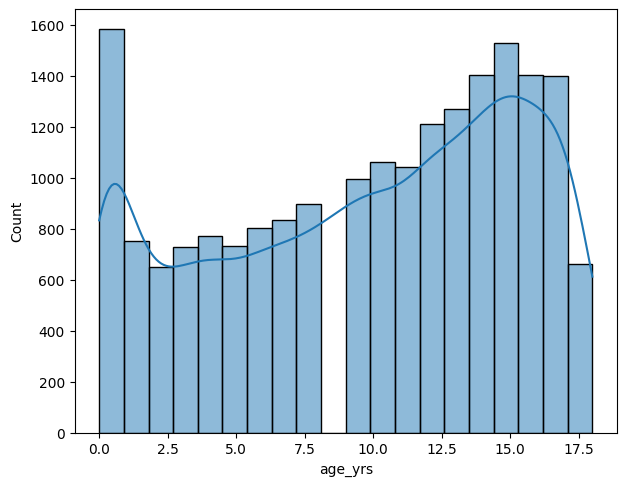

In [154]:
#Let's plot a line graph first before scaling to determine whether to use a min-max or Z-score scaler
plt.figure(figsize=(7,5.5))
sns.histplot(demo_pedi_raw_3['age_yrs'], bins=20, kde=True)
plt.show()

In [155]:
#Well we can use the min-max scaler

#Step 11: Apply the min-max scaler
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

demo_pedi_raw_3['age_norm'] = scaler.fit_transform(demo_pedi_raw_3[['age']]) #Keep double brackets for DataFrame input
demo_pedi_raw_3

,primaryid,caseid,i_f_code,age,age_cod,age_grp,sex,wt,wt_cod,init_fda_dt,fda_dt,reporter_country,occr_country,age_yrs,age_bin,age_norm
27,102763263,10276326,F,10.0,YR,C,M,NaN,NaN,20140703,20240825,US,US,10.00,Child,0.002071
30,102857464,10285746,F,4.0,YR,C,M,67.200,KG,20140709,20240916,US,US,4.00,Preschooler,0.000829
38,104473652,10447365,F,17.0,YR,T,M,58.968,KG,20140911,20240814,US,US,17.00,Teenager,0.003521
39,104475582,10447558,F,3.0,MON,I,F,NaN,NaN,20140911,20240814,US,US,0.25,Infant,0.000621
43,104802623,10480262,F,10.0,YR,NaN,F,NaN,NaN,20140929,20240903,US,US,10.00,Child,0.002071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405443,82673573,8267357,F,1.0,YR,I,F,NaN,NaN,20111121,20240924,PL,PL,1.00,Toddler,0.000207
405444,828579140,8285791,F,12.0,YR,NaN,M,NaN,NaN,20111213,20240905,CA,CA,12.00,Child,0.002486
405459,879556810,8795568,F,14.0,YR,T,M,78.000,KG,20120917,20240730,CA,CA,14.00,Teenager,0.002900
405468,89578312,8957831,F,6.0,YR,NaN,M,NaN,NaN,20121210,20240710,US,US,6.00,Preschooler,0.001243


In [156]:
demo_pedi_raw_3.isna().sum()

,0
primaryid,0
caseid,0
i_f_code,0
age,0
age_cod,0
age_grp,11783
sex,841
wt,14479
wt_cod,14479
init_fda_dt,0


In [157]:
len(demo_pedi_raw_3)

19719

In [158]:
#Step 12: Remove all gender values that are missing
demo_pedi_raw_4 = demo_pedi_raw_3.dropna(subset=['sex'])
len(demo_pedi_raw_4)

18878

In [159]:
#Step 13: Fix the missing values in the reporter country
demo_pedi_raw_4.isna().sum()

,0
primaryid,0
caseid,0
i_f_code,0
age,0
age_cod,0
age_grp,11258
sex,0
wt,13695
wt_cod,13695
init_fda_dt,0


In [162]:
#A function to Fixing origin country issue
def fix_country(df):
    if (df['reporter_country'] == 'COUNTRY NOT SPECIFIED') & (not pd.isna(df['occr_country'])):
        return df['occr_country']
    elif (df['reporter_country'] != 'COUNTRY NOT SPECIFIED') & (not pd.isna(df['occr_country'])):
        return df['occr_country']
    elif (df['reporter_country'] == 'COUNTRY NOT SPECIFIED') & (pd.isna(df['occr_country'])):
        return 'COUNTRY NOT SPECIFIED'
    elif (df['reporter_country'] != 'COUNTRY NOT SPECIFIED') & (pd.isna(df['occr_country'])):
        return df['reporter_country']

#pd.isna(df['wt_kg'])

In [163]:
demo_pedi_raw_4['Origin_country'] = demo_pedi_raw_4.apply(fix_country, axis=1)
demo_pedi_raw_4

<ipython-input-163-0ffea039315c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_pedi_raw_4['Origin_country'] = demo_pedi_raw_4.apply(fix_country, axis=1)


,primaryid,caseid,i_f_code,age,age_cod,age_grp,sex,wt,wt_cod,init_fda_dt,fda_dt,reporter_country,occr_country,age_yrs,age_bin,age_norm,Origin_country
27,102763263,10276326,F,10.0,YR,C,M,NaN,NaN,20140703,20240825,US,US,10.00,Child,0.002071,US
30,102857464,10285746,F,4.0,YR,C,M,67.200,KG,20140709,20240916,US,US,4.00,Preschooler,0.000829,US
38,104473652,10447365,F,17.0,YR,T,M,58.968,KG,20140911,20240814,US,US,17.00,Teenager,0.003521,US
39,104475582,10447558,F,3.0,MON,I,F,NaN,NaN,20140911,20240814,US,US,0.25,Infant,0.000621,US
43,104802623,10480262,F,10.0,YR,NaN,F,NaN,NaN,20140929,20240903,US,US,10.00,Child,0.002071,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405443,82673573,8267357,F,1.0,YR,I,F,NaN,NaN,20111121,20240924,PL,PL,1.00,Toddler,0.000207,PL
405444,828579140,8285791,F,12.0,YR,NaN,M,NaN,NaN,20111213,20240905,CA,CA,12.00,Child,0.002486,CA
405459,879556810,8795568,F,14.0,YR,T,M,78.000,KG,20120917,20240730,CA,CA,14.00,Teenager,0.002900,CA
405468,89578312,8957831,F,6.0,YR,NaN,M,NaN,NaN,20121210,20240710,US,US,6.00,Preschooler,0.001243,US


In [166]:
demo_pedi_raw_4['Origin_country'].notna().sum()

18878

In [167]:
#Step 14: remove all 'Country not specified' values from origin country
demo_pedi_raw_5 = demo_pedi_raw_4[demo_pedi_raw_4['Origin_country'] != 'COUNTRY NOT SPECIFIED']
demo_pedi_raw_5

,primaryid,caseid,i_f_code,age,age_cod,age_grp,sex,wt,wt_cod,init_fda_dt,fda_dt,reporter_country,occr_country,age_yrs,age_bin,age_norm,Origin_country
27,102763263,10276326,F,10.0,YR,C,M,NaN,NaN,20140703,20240825,US,US,10.00,Child,0.002071,US
30,102857464,10285746,F,4.0,YR,C,M,67.200,KG,20140709,20240916,US,US,4.00,Preschooler,0.000829,US
38,104473652,10447365,F,17.0,YR,T,M,58.968,KG,20140911,20240814,US,US,17.00,Teenager,0.003521,US
39,104475582,10447558,F,3.0,MON,I,F,NaN,NaN,20140911,20240814,US,US,0.25,Infant,0.000621,US
43,104802623,10480262,F,10.0,YR,NaN,F,NaN,NaN,20140929,20240903,US,US,10.00,Child,0.002071,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405443,82673573,8267357,F,1.0,YR,I,F,NaN,NaN,20111121,20240924,PL,PL,1.00,Toddler,0.000207,PL
405444,828579140,8285791,F,12.0,YR,NaN,M,NaN,NaN,20111213,20240905,CA,CA,12.00,Child,0.002486,CA
405459,879556810,8795568,F,14.0,YR,T,M,78.000,KG,20120917,20240730,CA,CA,14.00,Teenager,0.002900,CA
405468,89578312,8957831,F,6.0,YR,NaN,M,NaN,NaN,20121210,20240710,US,US,6.00,Preschooler,0.001243,US


In [168]:
#Let's check if the weights are in KG or not
demo_pedi_raw_5['wt_cod'].value_counts()

,count
wt_cod,
KG,5176
LBS,3


In [169]:
#All the weights with a wt_cod has a wt value. Others are both nill
demo_pedi_raw_5.notna().sum()

,0
primaryid,18874
caseid,18874
i_f_code,18874
age,18874
age_cod,18874
age_grp,7617
sex,18874
wt,5179
wt_cod,5179
init_fda_dt,18874


In [170]:
#A function to convert lbs values to kg
def lbs_to_kg(df):
  if not pd.isna(df['wt_cod']):
    if df['wt_cod'] == 'LBS':
      conv = df['wt'] / 2.2
      return conv
    elif df['wt_cod'] == 'KG':
      return df['wt']

In [171]:
#Step 15: Convert lbs values to kg
demo_pedi_raw_5['wt_kg'] = demo_pedi_raw_5.apply(lbs_to_kg, axis=1)
demo_pedi_raw_5.notna().sum()

<ipython-input-171-7e215c1ce15d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_pedi_raw_5['wt_kg'] = demo_pedi_raw_5.apply(lbs_to_kg, axis=1)


,0
primaryid,18874
caseid,18874
i_f_code,18874
age,18874
age_cod,18874
age_grp,7617
sex,18874
wt,5179
wt_cod,5179
init_fda_dt,18874


In [172]:
#Step 16: Let's remove all weight values that has a wt value but not a wt_cod
demo_pedi_raw_6 = demo_pedi_raw_5[~((demo_pedi_raw_5['wt_cod'].isna() == True) & (demo_pedi_raw_5['wt'].isna() == False))]
demo_pedi_raw_6

,primaryid,caseid,i_f_code,age,age_cod,age_grp,sex,wt,wt_cod,init_fda_dt,fda_dt,reporter_country,occr_country,age_yrs,age_bin,age_norm,Origin_country,wt_kg
27,102763263,10276326,F,10.0,YR,C,M,NaN,NaN,20140703,20240825,US,US,10.00,Child,0.002071,US,NaN
30,102857464,10285746,F,4.0,YR,C,M,67.200,KG,20140709,20240916,US,US,4.00,Preschooler,0.000829,US,67.200
38,104473652,10447365,F,17.0,YR,T,M,58.968,KG,20140911,20240814,US,US,17.00,Teenager,0.003521,US,58.968
39,104475582,10447558,F,3.0,MON,I,F,NaN,NaN,20140911,20240814,US,US,0.25,Infant,0.000621,US,NaN
43,104802623,10480262,F,10.0,YR,NaN,F,NaN,NaN,20140929,20240903,US,US,10.00,Child,0.002071,US,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405443,82673573,8267357,F,1.0,YR,I,F,NaN,NaN,20111121,20240924,PL,PL,1.00,Toddler,0.000207,PL,NaN
405444,828579140,8285791,F,12.0,YR,NaN,M,NaN,NaN,20111213,20240905,CA,CA,12.00,Child,0.002486,CA,NaN
405459,879556810,8795568,F,14.0,YR,T,M,78.000,KG,20120917,20240730,CA,CA,14.00,Teenager,0.002900,CA,78.000
405468,89578312,8957831,F,6.0,YR,NaN,M,NaN,NaN,20121210,20240710,US,US,6.00,Preschooler,0.001243,US,NaN


In [173]:
demo_pedi_raw_6[demo_pedi_raw_6['wt_cod'] == 'LBS']

,primaryid,caseid,i_f_code,age,age_cod,age_grp,sex,wt,wt_cod,init_fda_dt,fda_dt,reporter_country,occr_country,age_yrs,age_bin,age_norm,Origin_country,wt_kg
117399,240666241,24066624,I,16.0,YR,NaN,F,90.0,LBS,20240709,20240709,US,NaN,16.00,Teenager,0.003314,US,40.909091
321867,242873801,24287380,I,9.0,WK,NaN,M,9388.0,LBS,20240904,20240904,US,NaN,0.17,Infant,0.001864,US,4267.272727
339261,243066371,24306637,I,13.0,YR,NaN,F,170.0,LBS,20240910,20240910,US,NaN,13.00,Teenager,0.002693,US,77.272727


In [174]:
#removing outlier values

#A function to check validity of weights
def check_wt_validity(df):
  if pd.isna(df['wt_kg']):
    return "Missing weight"
  else:
    if df['age_bin'] == 'Neonate':
      if (df['wt_kg'] >= 2.5) and (df['wt_kg'] < 4.5):
        return "Valid Weight"
      else:
        return "Invalid Weight"
    elif df['age_bin'] == 'Infant':
      if (df['wt_kg'] >= 4.4) and (df['wt_kg'] < 11.3):
        return "Valid Weight"
      else:
        return "Invalid Weight"
    elif df['age_bin'] == 'Toddler':
      if (df['wt_kg'] >= 8.5) and (df['wt_kg'] < 17.5):
        return "Valid Weight"
      else:
        return "Invalid Weight"
    elif df['age_bin'] == 'Preschooler':
      if (df['wt_kg'] >= 12.5) and (df['wt_kg'] < 25.8):
        return "Valid Weight"
      else:
        return "Invalid Weight"
    elif df['age_bin'] == 'Child':
      if (df['wt_kg'] >= 19.8) and (df['wt_kg'] < 51):
        return "Valid Weight"
      else:
        return "Invalid Weight"
    elif df['age_bin'] == 'Teenager':
      if (df['wt_kg'] >= 39) and (df['wt_kg'] < 81):
        return "Valid Weight"
      else:
        return "Invalid Weight"

In [175]:
#Step 17: Let's check the validity in weights
demo_pedi_raw_6['Valid_Wt'] = demo_pedi_raw_6.apply(check_wt_validity, axis=1)
demo_pedi_raw_6

,primaryid,caseid,i_f_code,age,age_cod,age_grp,sex,wt,wt_cod,init_fda_dt,fda_dt,reporter_country,occr_country,age_yrs,age_bin,age_norm,Origin_country,wt_kg,Valid_Wt
27,102763263,10276326,F,10.0,YR,C,M,NaN,NaN,20140703,20240825,US,US,10.00,Child,0.002071,US,NaN,Missing weight
30,102857464,10285746,F,4.0,YR,C,M,67.200,KG,20140709,20240916,US,US,4.00,Preschooler,0.000829,US,67.200,Invalid Weight
38,104473652,10447365,F,17.0,YR,T,M,58.968,KG,20140911,20240814,US,US,17.00,Teenager,0.003521,US,58.968,Valid Weight
39,104475582,10447558,F,3.0,MON,I,F,NaN,NaN,20140911,20240814,US,US,0.25,Infant,0.000621,US,NaN,Missing weight
43,104802623,10480262,F,10.0,YR,NaN,F,NaN,NaN,20140929,20240903,US,US,10.00,Child,0.002071,US,NaN,Missing weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405443,82673573,8267357,F,1.0,YR,I,F,NaN,NaN,20111121,20240924,PL,PL,1.00,Toddler,0.000207,PL,NaN,Missing weight
405444,828579140,8285791,F,12.0,YR,NaN,M,NaN,NaN,20111213,20240905,CA,CA,12.00,Child,0.002486,CA,NaN,Missing weight
405459,879556810,8795568,F,14.0,YR,T,M,78.000,KG,20120917,20240730,CA,CA,14.00,Teenager,0.002900,CA,78.000,Valid Weight
405468,89578312,8957831,F,6.0,YR,NaN,M,NaN,NaN,20121210,20240710,US,US,6.00,Preschooler,0.001243,US,NaN,Missing weight


In [176]:
demo_pedi_raw_6['Valid_Wt'].value_counts()

,count
Valid_Wt,
Missing weight,13695
Valid Weight,3885
Invalid Weight,1294


In [177]:
demo_pedi_raw_6[demo_pedi_raw_6['Valid_Wt'] == 'Invalid Weight']

,primaryid,caseid,i_f_code,age,age_cod,age_grp,sex,wt,wt_cod,init_fda_dt,fda_dt,reporter_country,occr_country,age_yrs,age_bin,age_norm,Origin_country,wt_kg,Valid_Wt
30,102857464,10285746,F,4.0,YR,C,M,67.2,KG,20140709,20240916,US,US,4.0,Preschooler,0.000829,US,67.2,Invalid Weight
97,109752886,10975288,F,8.0,YR,C,M,18.0,KG,20150401,20240805,CZ,CZ,8.0,Child,0.001657,CZ,18.0,Invalid Weight
155,1149087939,11490879,F,3.0,YR,C,F,64.0,KG,20150910,20240823,CA,CA,3.0,Toddler,0.000621,CA,64.0,Invalid Weight
158,1151574950,11515749,F,1.0,YR,NaN,F,64.0,KG,20150916,20240827,CA,CA,1.0,Toddler,0.000207,CA,64.0,Invalid Weight
521,1310930130,13109301,F,12.0,YR,T,F,64.0,KG,20170112,20240807,CA,CA,12.0,Child,0.002486,CA,64.0,Invalid Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403546,243792541,24379254,I,18.0,YR,NaN,M,106.1,KG,20240929,20240929,US,NaN,18.0,Teenager,0.003728,US,106.1,Invalid Weight
404291,243801391,24380139,I,17.0,YR,T,M,132.0,KG,20240930,20240930,US,US,17.0,Teenager,0.003521,US,132.0,Invalid Weight
404527,243804071,24380407,I,6.0,YR,C,M,32.7,KG,20240930,20240930,US,US,6.0,Preschooler,0.001243,US,32.7,Invalid Weight
404819,243807241,24380724,I,5.0,YR,NaN,M,26.0,KG,20240930,20240930,FR,FR,5.0,Preschooler,0.001036,FR,26.0,Invalid Weight


In [178]:
#Step 18: Now disregard invalid weights
demo_pedi_raw_7 = demo_pedi_raw_6[demo_pedi_raw_6['Valid_Wt'] != 'Invalid Weight']
demo_pedi_raw_7.notna().sum()

,0
primaryid,17580
caseid,17580
i_f_code,17580
age,17580
age_cod,17580
age_grp,7220
sex,17580
wt,3885
wt_cod,3885
init_fda_dt,17580


No need to check the validity in age. Because I convert age values into age_yrs and put the binning based on that

In [179]:
demo_pedi_raw_7.head()

,primaryid,caseid,i_f_code,age,age_cod,age_grp,sex,wt,wt_cod,init_fda_dt,fda_dt,reporter_country,occr_country,age_yrs,age_bin,age_norm,Origin_country,wt_kg,Valid_Wt
27,102763263,10276326,F,10.0,YR,C,M,NaN,NaN,20140703,20240825,US,US,10.00,Child,0.002071,US,NaN,Missing weight
38,104473652,10447365,F,17.0,YR,T,M,58.968,KG,20140911,20240814,US,US,17.00,Teenager,0.003521,US,58.968,Valid Weight
39,104475582,10447558,F,3.0,MON,I,F,NaN,NaN,20140911,20240814,US,US,0.25,Infant,0.000621,US,NaN,Missing weight
43,104802623,10480262,F,10.0,YR,NaN,F,NaN,NaN,20140929,20240903,US,US,10.00,Child,0.002071,US,NaN,Missing weight
46,105154135,10515413,F,9.0,YR,NaN,F,NaN,NaN,20141014,20240925,FR,FR,9.00,Child,0.001864,FR,NaN,Missing weight


In [180]:
#Step 19: Only get the necessary columns
demo_pedi_transformed = demo_pedi_raw_7[['primaryid', 'caseid', 'i_f_code', 'age_yrs', 'age_bin', 'age_norm', 'sex', 'wt_kg', 'Origin_country', 'init_fda_dt', 'fda_dt']]
demo_pedi_transformed

,primaryid,caseid,i_f_code,age_yrs,age_bin,age_norm,sex,wt_kg,Origin_country,init_fda_dt,fda_dt
27,102763263,10276326,F,10.00,Child,0.002071,M,NaN,US,20140703,20240825
38,104473652,10447365,F,17.00,Teenager,0.003521,M,58.968,US,20140911,20240814
39,104475582,10447558,F,0.25,Infant,0.000621,F,NaN,US,20140911,20240814
43,104802623,10480262,F,10.00,Child,0.002071,F,NaN,US,20140929,20240903
46,105154135,10515413,F,9.00,Child,0.001864,F,NaN,FR,20141014,20240925
...,...,...,...,...,...,...,...,...,...,...,...
405443,82673573,8267357,F,1.00,Toddler,0.000207,F,NaN,PL,20111121,20240924
405444,828579140,8285791,F,12.00,Child,0.002486,M,NaN,CA,20111213,20240905
405459,879556810,8795568,F,14.00,Teenager,0.002900,M,78.000,CA,20120917,20240730
405468,89578312,8957831,F,6.00,Preschooler,0.001243,M,NaN,US,20121210,20240710


In [181]:
demo_pedi_transformed.isna().sum()

,0
primaryid,0
caseid,0
i_f_code,0
age_yrs,0
age_bin,0
age_norm,0
sex,0
wt_kg,13695
Origin_country,0
init_fda_dt,0


Now I can use the functions above to transform the demographics dataset and extract only clean ones to build a dataset for training the regression model